In [1]:
import os
os.chdir("/data/t-achetan/adv_geom/src/")

import numpy as np
import scipy as sp
import numpy.linalg as npla
import scipy.linalg as spla

import torch
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
from datagen.synthetic.multiple import concentricspheres, intertwinedswissrolls, wellseparatedspheres





# DL Diagnostic





In [5]:
# run_dir = "/mnt/t-achetan/expC_dist_learner_for_adv_ex/rdm_swrolls_test/rdm_swrolls_k50n500_noninfdist_moreoffmfldv3_inferred_maxtdelta_1e-3/1"
run_dir = "/mnt/t-achetan/expC_dist_learner_for_adv_ex/rdm_swrolls_test/rdm_swrolls_k2n500_noninfdist_moreoffmfld__bs4096_inferred_maxtdelta=1e=3/2"
# run_dir = "/azuredrive/deepimage/data1/t-achetan/adv_geom_dumps/dumps/expC_dist_learner_for_adv_ex/rf_expts/rdm_swrolls/rdm_swrolls_k50n500/1/"


logits_fn = os.path.join(run_dir, "logits", "val", "logits.pt")
logits = torch.load(logits_fn)
targets_fn = os.path.join(run_dir, "logits", "val", "targets.pt")
targets = torch.load(targets_fn)




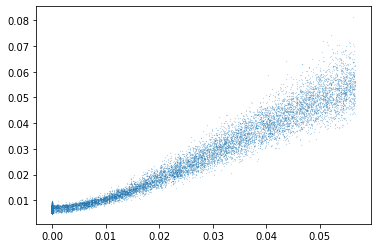

In [6]:
plt.scatter(torch.min(targets, dim=1)[0].numpy(), torch.min(logits, dim=1)[0].numpy(), s=0.01)





In [18]:
gt_min_dists, gt_min_labels = torch.min(targets, dim=1)
pred_min_dists, pred_min_labels = torch.min(logits, dim=1)

ths = np.arange(1e-4, 0.015, 5e-4)
ths = np.append(ths, np.inf)

perfs = list()

for th in ths:
    
    pred_min_labels_off = pred_min_labels.clone()
    pred_min_labels_off[pred_min_dists > th] = 2
    
    gt_min_labels_off = gt_min_labels.clone()
    gt_min_labels_off[gt_min_dists > th] = 2
    
    perfs.append(classification_report(gt_min_labels_off, pred_min_labels_off, output_dict=True)["accuracy"])



/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


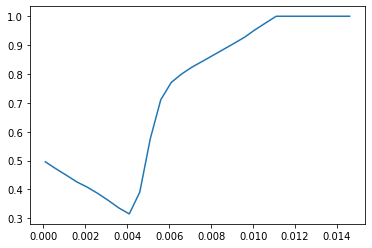

In [19]:
plt.plot(ths, perfs)

In [20]:
ths

array([0.0001, 0.0006, 0.0011, 0.0016, 0.0021, 0.0026, 0.0031, 0.0036,
       0.0041, 0.0046, 0.0051, 0.0056, 0.0061, 0.0066, 0.0071, 0.0076,
       0.0081, 0.0086, 0.0091, 0.0096, 0.0101, 0.0106, 0.0111, 0.0116,
       0.0121, 0.0126, 0.0131, 0.0136, 0.0141, 0.0146,    inf])